In [28]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Sources:
https://www.federalreserve.gov/econres/scfindex.htm#table3
descriptions: https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkfx0.htm
https://www.federalreserve.gov/econres/files/Networth%20Flowchart.pdf

In [48]:
current_path = os.getcwd()
data_path = os.path.join(current_path,'data','SCFP2019.csv')
df = pd.read_csv(data_path)

Variables to keep: transaction accounts (deposits), certificates of deposit (CDs), bonds, stocks, mutual funds, and retirement assets
From Carrol paper


In [49]:
vars = {'WGT': 'Sample weight',
        'CDS': 'Total value of certificates of deposit held by household, 2019 dollars',
        'LIQ': 'Total value of all types of transactions accounts, 2019 dollars',
        'NMMF': 'Directly held pooled investment funds (exc. money mkt funds)',
        'SAVBND': 'Savings bonds',
        'STOCKS': 'Directly held stocks',
        'BOND': 'Directly held bonds (excl. bond funds orsavings bonds',
        'CASHLI': 'Cash value of whole life insurance',
        'OTHMA': 'Other managed assets',
        'RETQLIQ': 'Quasi-liquid retirement accounts',
        'OTHFIN': 'Other misc. financial assets',
        'FIN': 'Total financial assets'
}

In [51]:
df['weight'] = df['WGT'] / df['WGT'].sum()
# df['total'] = all others sum to FIN
df['weighted_FIN_assets'] = df['weight'] * df['FIN']
df = df.sort_values('FIN')
tab = np.asarray(df.loc[:, ['weight', 'FIN', 'weighted_FIN_assets']])

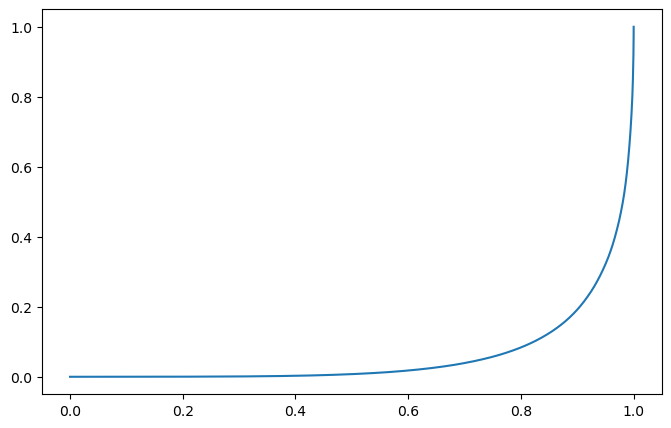

In [52]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.insert(tab[:,0].cumsum(), 0,0),np.insert((tab[:,2] / tab[:,2].sum()).cumsum(),0,0),label='Liquid assets')